## 1. Loading Libraries and Initial Inspection of the Dataset

In [9]:
# Installing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Disabling FutureWarning alerts
warnings.filterwarnings("ignore", category=FutureWarning)

In [11]:
# Loading the data set
data = pd.read_csv('covid_19_data.csv')
data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [13]:
# Columns in the data set and their types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   Province/State   228326 non-null  object 
 3   Country/Region   306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB


In [17]:
# Overview of missing values
data.isnull().sum()

SNo                    0
ObservationDate        0
Province/State     78103
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [21]:
# Basic statistical summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SNo,306429.0,153215.000000,88458.577156,1.0,76608.0,153215.0,229822.0,306429.0
Confirmed,306429.0,85670.911559,277551.604043,-302844.0,1042.0,10375.0,50752.0,5863138.0
Deaths,306429.0,2036.403268,6410.938048,-178.0,13.0,192.0,1322.0,112385.0
Recovered,306429.0,50420.286304,201512.447838,-854405.0,11.0,1751.0,20270.0,6399531.0


## 2. Data Analysis Before Generating Missing Data

In [40]:
# Unique value count of each column
data.nunique()

SNo                306429
ObservationDate       494
Province/State        736
Country/Region        229
Last Update          1905
Confirmed          107146
Deaths              20089
Recovered           74541
dtype: int64

In [48]:
# Sample values by column
for column in data.columns:
    print(f"\n The first 5 unique values of the '{column}' column: ")
    print(data[column].unique()[:5])


 The first 5 unique values of the 'SNo' column: 
[1 2 3 4 5]

 The first 5 unique values of the 'ObservationDate' column: 
['01/22/2020' '01/23/2020' '01/24/2020' '01/25/2020' '01/26/2020']

 The first 5 unique values of the 'Province/State' column: 
['Anhui' 'Beijing' 'Chongqing' 'Fujian' 'Gansu']

 The first 5 unique values of the 'Country/Region' column: 
['Mainland China' 'Hong Kong' 'Macau' 'Taiwan' 'US']

 The first 5 unique values of the 'Last Update' column: 
['1/22/2020 17:00' '1/23/20 17:00' '1/24/20 17:00' '1/25/20 17:00'
 '1/26/20 16:00']

 The first 5 unique values of the 'Confirmed' column: 
[ 1. 14.  6.  0. 26.]

 The first 5 unique values of the 'Deaths' column: 
[ 0. 17. 24.  1. 40.]

 The first 5 unique values of the 'Recovered' column: 
[ 0. 28.  2. 31.  1.]


In [52]:
# Distribution of categorical variables
categorical_columns = ['Country/Region', 'Province/State']
for column in categorical_columns:
    print(f"\n'value distribution of the {column}' column:")
    print(data[column].value_counts())


'value distribution of the Country/Region' column:
Country/Region
Russia                 30251
US                     26740
Japan                  18059
Mainland China         15758
India                  13182
                       ...  
 Azerbaijan                1
North Ireland              1
Republic of Ireland        1
Cape Verde                 1
East Timor                 1
Name: count, Length: 229, dtype: int64

'value distribution of the Province/State' column:
Province/State
Unknown                         4123
Amazonas                        1109
Diamond Princess cruise ship     924
Grand Princess                   882
Punjab                           708
                                ... 
Harrison County, KY                1
Queens County, NY                  1
Johnson County, IA                 1
Unassigned Location, VT            1
Charlotte County, FL               1
Name: count, Length: 736, dtype: int64


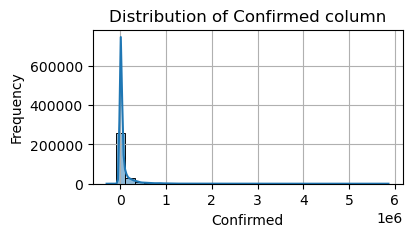

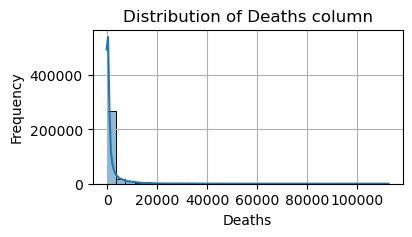

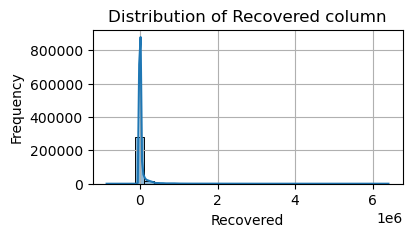

In [58]:
# Distribution of numeric columns (histogram)
numerical_columns = ['Confirmed', 'Deaths', 'Recovered']
for column in numerical_columns:
    plt.figure(figsize=(4, 2))
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(f'Distribution of {column} column')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

## 3. Exploratory Data Analysis (EDA)

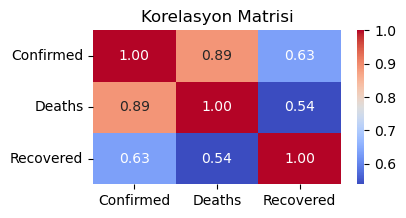

In [66]:
# Correlation Matrix

correlation_matrix = data[['Confirmed', 'Deaths', 'Recovered']].corr()

plt.figure(figsize=(4, 2))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Korelasyon Matrisi')
plt.show()

## 4. Cleaning Missing Data
* Filling Missing Data: Missing data were filled with the average value of each column.
* Examining the Status After Cleaning

In [75]:
# Distinguish between numeric and non-numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
non_numeric_columns = data.select_dtypes(exclude=['float64', 'int64']).columns

In [89]:
# 1. Fill missing data in numeric columns with the mean
data[numeric_columns] = data[numeric_columns].apply(lambda x: x.fillna(x.mean()))

In [91]:
# 2. Fill missing data in non-numeric columns appropriately (e.g. ‘Unknown’)
data[non_numeric_columns] = data[non_numeric_columns].apply(lambda x: x.fillna('Unknown'))

In [93]:
data.isnull().sum()

SNo                0
ObservationDate    0
Province/State     0
Country/Region     0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   Province/State   306429 non-null  object 
 3   Country/Region   306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB


## 5. Statistical Analysis and Visualization

#### 5.1 Total Number of Cases, Deaths and Recoveries Bar Chart

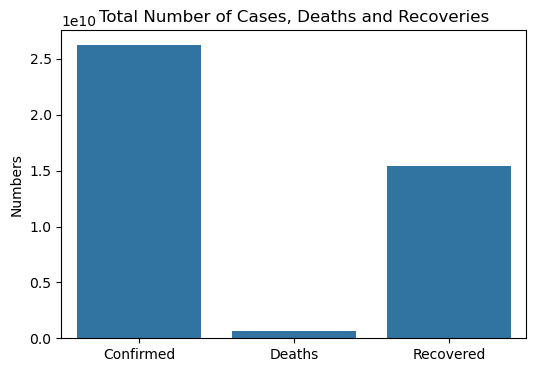

In [106]:
plt.figure(figsize=(6,4))
sns.barplot(x=['Confirmed', 'Deaths', 'Recovered'], y=[data['Confirmed'].sum(), data['Deaths'].sum(), data['Recovered'].sum()])
plt.title('Total Number of Cases, Deaths and Recoveries')
plt.ylabel('Numbers')
plt.show()

#### 5.2 Mortality Rate Distribution

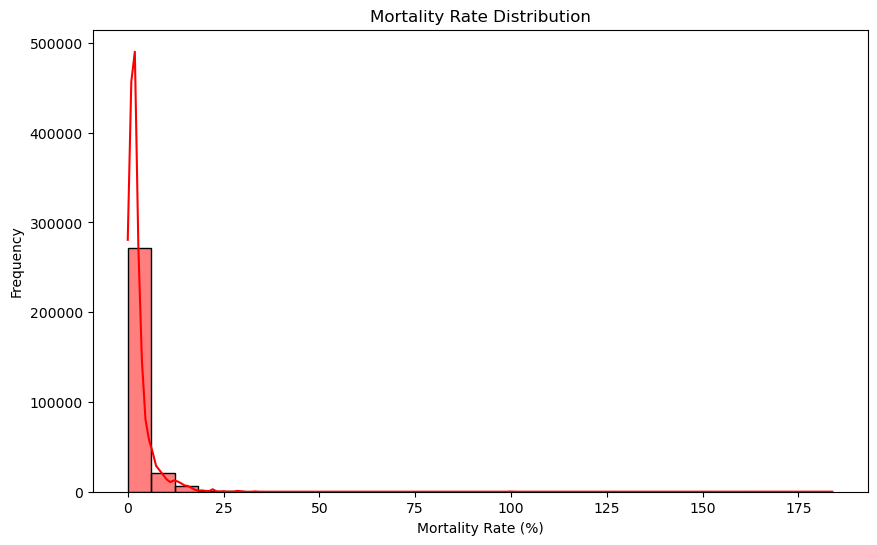

In [109]:
data['Mortality Rate'] = (data['Deaths'] / data['Confirmed']) * 100
plt.figure(figsize=(10, 6))
sns.histplot(data['Mortality Rate'], kde=True, color='red', bins=30)
plt.title('Mortality Rate Distribution')
plt.xlabel('Mortality Rate (%)')
plt.ylabel('Frequency')
plt.show()